In [1]:
import matplotlib.pyplot as plt
import numpy as np
import power_spectra.rebin_powerspec as rb_psd  ## in power_spectra

%matplotlib inline

In [2]:
df = 0.0162357380
freqs = np.arange(0, df*(4097), step=df, dtype=np.float64)
# powers1 = np.loadtxt("GX339-4HzCQPO_chan4-qpo-power.txt")
powers1 = np.loadtxt("GX339-4HzCQPO_ref-harm-model-power.txt")
powers2 = np.loadtxt("GX339-4HzCQPO_ref-qpo-model-power.txt")
# powers3 = np.loadtxt("GX339-4HzCQPO_filt-cross-rot-norm.txt")
# powers4 = np.loadtxt("GX339-4HzCQPO_filt-cross-norm-rot.txt")
# powers3 = np.loadtxt("GX339-4HzCQPO_filt-cross-norm-nooffset.txt")
# powers4 = np.loadtxt("GX339-4HzCQPO_filt-cross-phaseoffset.txt")

In [4]:
rb_freq, rb_power1, rb_err, freq_min, freq_max = rb_psd.geometric_rebinning(\
            freqs, powers1[0:4097], np.arange(4097), 1.04)
rb_freq, rb_power2, rb_err, freq_min, freq_max = rb_psd.geometric_rebinning(\
            freqs, powers2[0:4097], np.arange(4097), 1.04)
# rb_freq, rb_power3, rb_err, freq_min, freq_max = rb_psd.geometric_rebinning(\
#             freqs, powers3, np.arange(4097), 1.04)
# rb_freq, rb_power4, rb_err, freq_min, freq_max = rb_psd.geometric_rebinning(\
#             freqs, powers4, np.arange(4097), 1.04)
vpv1 = rb_freq * rb_power1
vpv2 = rb_freq * rb_power2
# vpv3 = rb_freq * rb_power3
# vpv4 = rb_freq * rb_power4

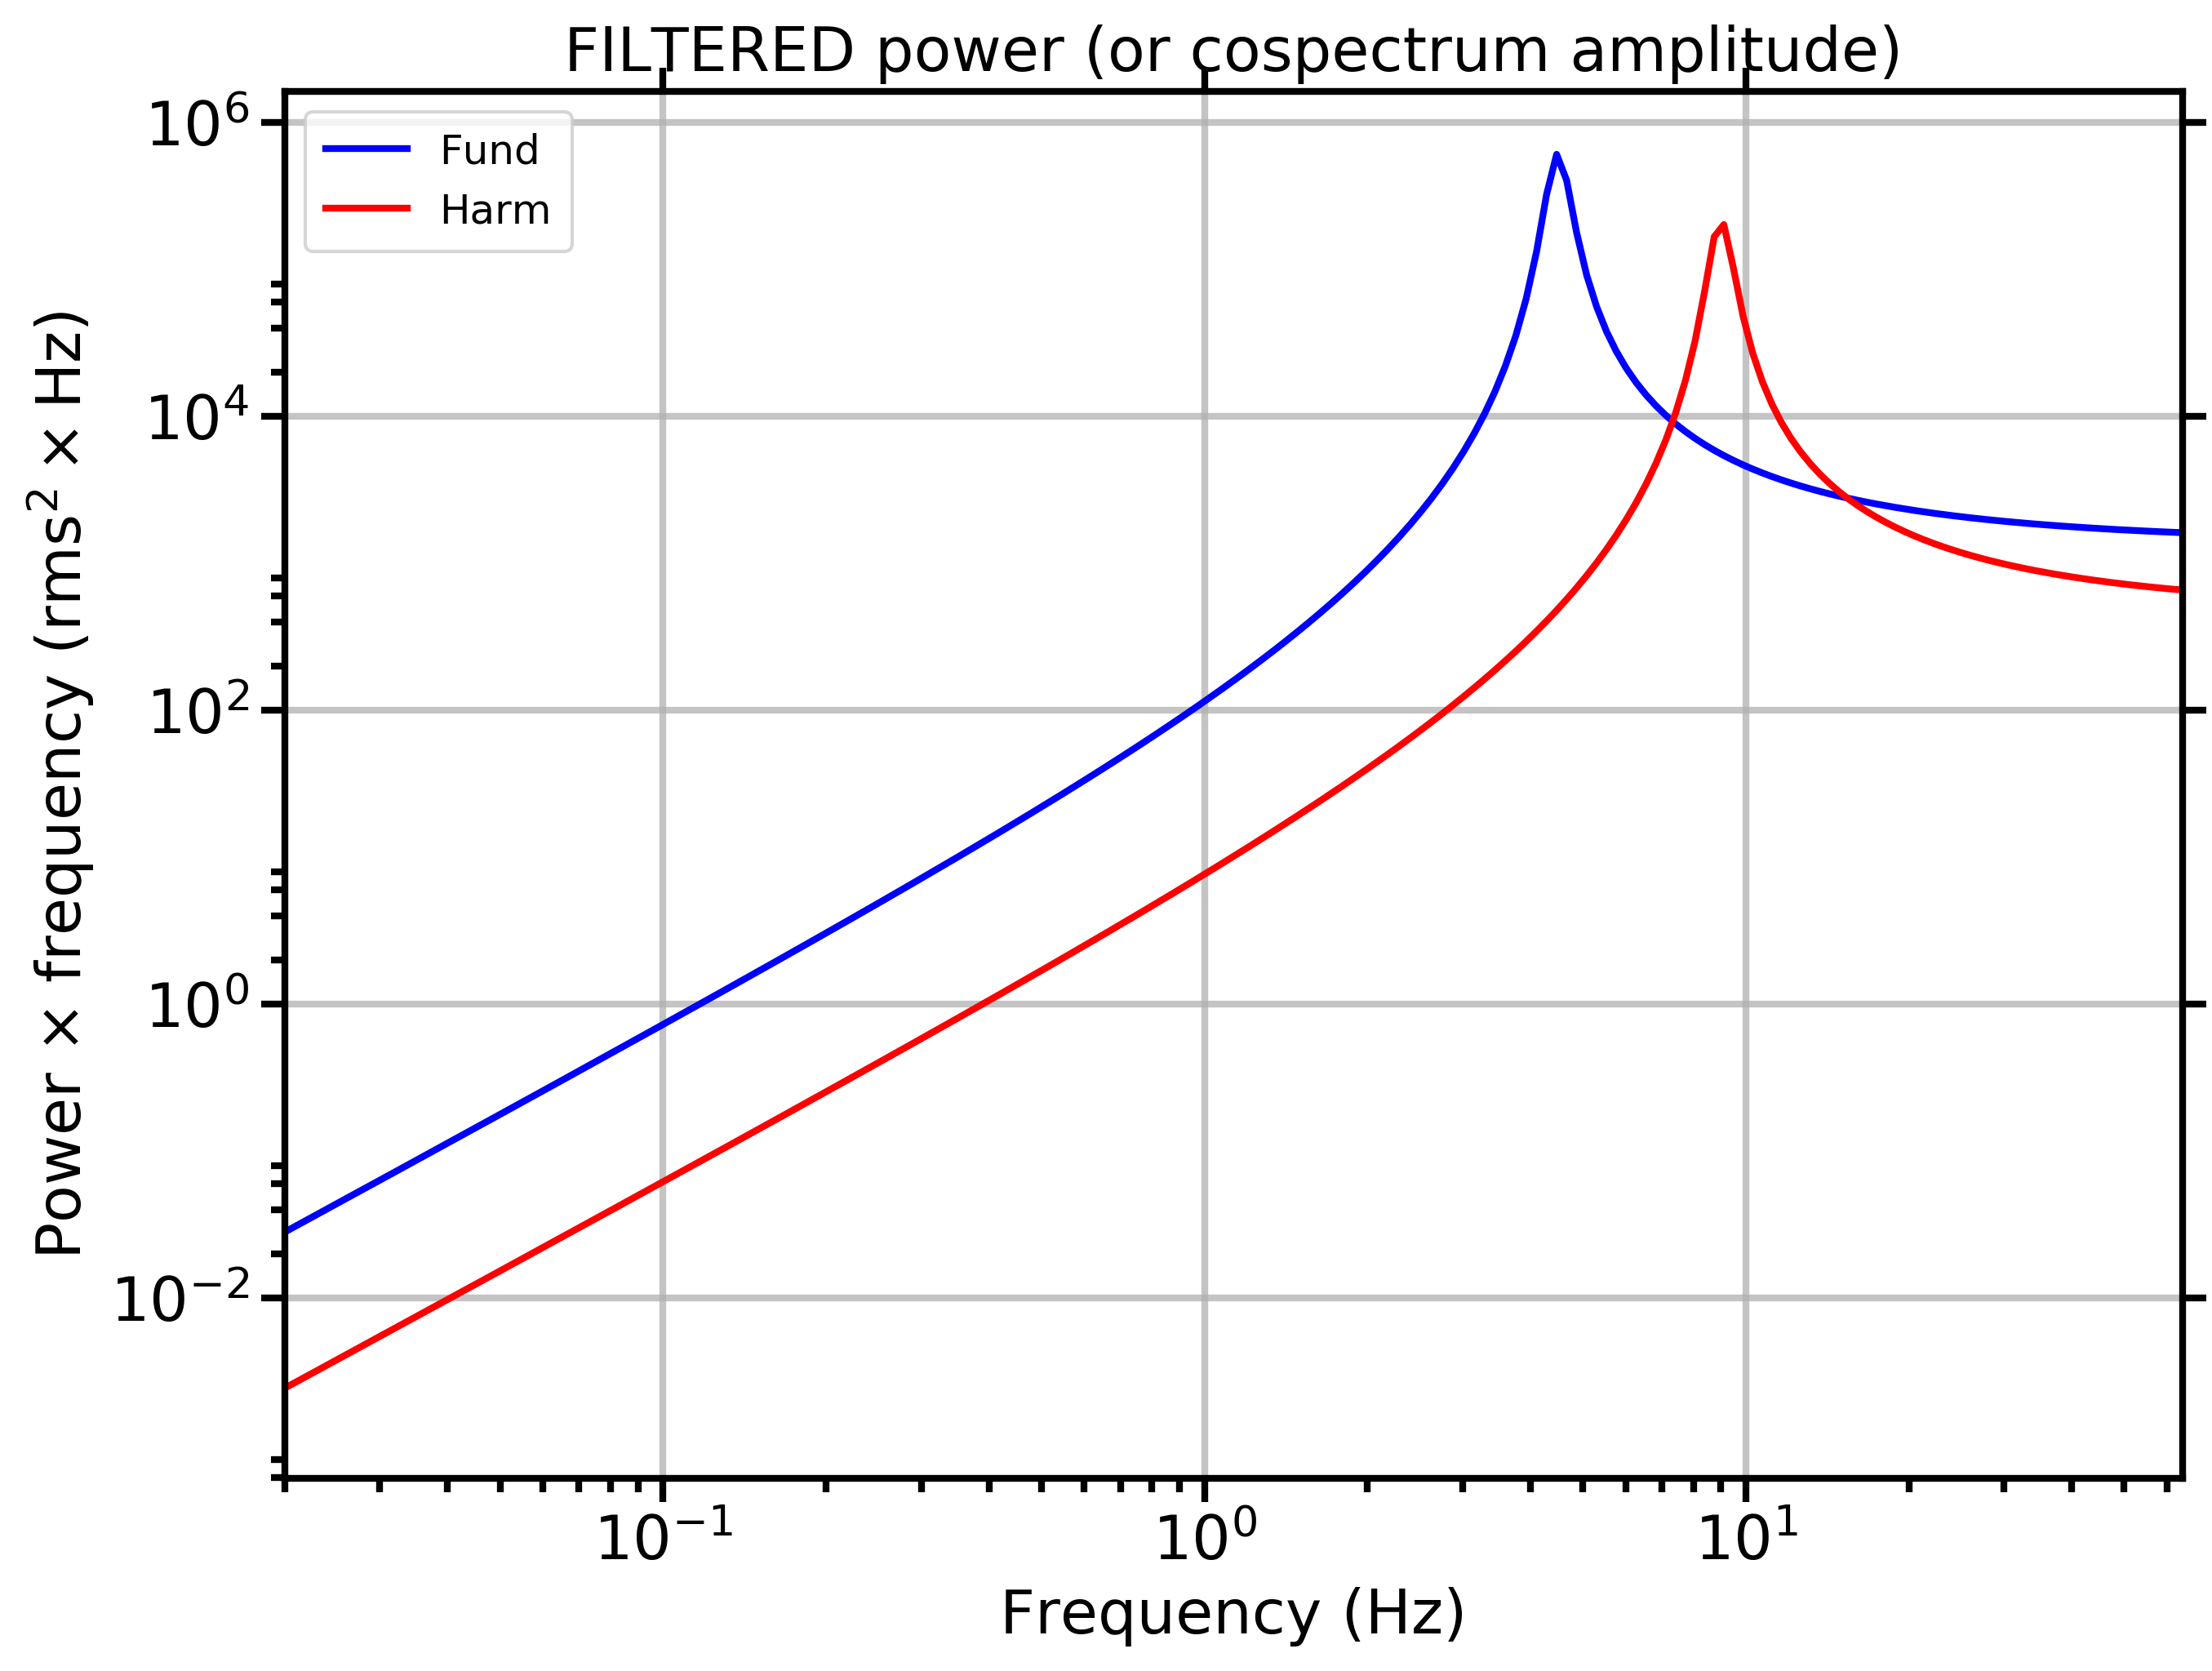

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,7.5), dpi=300)
ax.plot(rb_freq, vpv2, lw=2, c='blue', label="Fund")
ax.plot(rb_freq, vpv1, lw=2, c='red', label="Harm")
# ax.plot(rb_freq, vpv3, lw=2, c='black', ls='dashed', label="Cross 4, ref norm w no offset")
# ax.plot(rb_freq, vpv4, lw=2, c='green', label="Cross 4, ref norm w phase offset")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.02, 64)
# ax.set_ylim(1e-7, 1e-1)
ax.grid(True, which='major', lw=2, alpha=0.75)
# ax.grid(True, which='minor', lw=1, alpha=0.5)
ax.set_xlabel('Frequency (Hz)', fontsize=18)
ax.set_ylabel(r'Power $\times$ frequency (rms$^{2}\times$Hz)', fontsize=18)
ax.set_title('FILTERED power (or cospectrum amplitude)', fontsize=18)
ax.tick_params(axis='x', labelsize=18, bottom=True, top=True, \
    labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=18, left=True, right=True, \
    labelleft=True, labelright=False)
ax.tick_params(which='major', width=2, length=7)
ax.tick_params(which='minor', width=2, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', fontsize=12,
            borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)
plt.savefig("filtered_psd_and_cs.png")
plt.show()

In [35]:
print(np.max(vpv4), np.argmax(vpv4))
print(np.max(vpv4[70:]), np.argmax(vpv4[70:])+70)
print np.max(vpv4) / np.max(vpv4[70:])

(1.2069247273970675e-07, 63)
(5.1599300127938233e-08, 80)
2.33903313495
